### In this programming assignment, we will classifiy IMDB reviews into positive and negative reviews.
### We will download the raw IMDB reviews in text format. To convert the words into tensors, we use word embeddings.
### We will first use one of the pre-trained GloVe word embeddings. And then try to improve the embedding.
### To evaluate wether one embedding is better than the other, we use a list of positive words, and a list of negative words. We check how the positive words and negative words are spread in an embedding.  Idealy, we want all the positive words to be very close, and all the negative words to be very close in the embedding space, while positive words and negative words be far away from each other. We will define a function to measure how good an embedding is to sperate positive and negative words.
### Using this function, we evaluate the following three embebeddings.
- The glove embedding
- The dense embedding: we use the glove embedding as the initial embbedding and jointly train the embedding and the calssifier using a dense network. We call the resultant embedding the dense embedding.
- The LSTM embedding: we use the glove embedding as the initial embedding and jontly train the embedding and the classifier using a LSTM model. We call the resultant embedding the LSTM embedding.

### From the above three candidates, we choose the best embedding and stack a LSTM layer and a Conv1D layer to build our classifier. We use the dropout to fight overfitting. Our goal is to obtain a classifier that can achieve 90% of accuracy.

### Note we only need to fill in part of the code. But we do need to run all the code and generate your own results. Our results could be different from the ones shown in this file.

### For grading this assignment, each coding block we fill in will receive different corresponding point, as shown later. All the points add up to 100.

# Data preparation

Before we start, we need to make a folder named hw7 in Google drive and upload the following files under the folder.


*   aclImdb_v1.tar.gz
*   glove.6B.zip
*   positive.txt
*   negative.txt





Next, we mount Google drive, copy these files to local, and uncompress the compressed files using the following commands.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!tar -zxvf /content/drive/My\ Drive/hw7/aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [3]:
!unzip /content/drive/My\ Drive/hw7/glove.6B.zip

Archive:  /content/drive/My Drive/hw7/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [4]:
!cp /content/drive/My\ Drive/hw7/positive.txt .
!cp /content/drive/My\ Drive/hw7/negative.txt .

### Read a list of positive words from a file, and read a list of negative words from another file.

In [5]:
filepath = 'positive.txt'
L_pos = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_pos.append(line.strip())
        line = fp.readline()
        cnt += 1

for word in L_pos:
    print(word)
print(len(L_pos))

a+
abound
abounds
abundance
abundant
accessable
accessible
acclaim
acclaimed
acclamation
accolade
accolades
accommodative
accomodative
accomplish
accomplished
accomplishment
accomplishments
accurate
accurately
achievable
achievement
achievements
achievible
acumen
adaptable
adaptive
adequate
adjustable
admirable
admirably
admiration
admire
admirer
admiring
admiringly
adorable
adore
adored
adorer
adoring
adoringly
adroit
adroitly
adulate
adulation
adulatory
advanced
advantage
advantageous
advantageously
advantages
adventuresome
adventurous
advocate
advocated
advocates
affability
affable
affably
affectation
affection
affectionate
affinity
affirm
affirmation
affirmative
affluence
affluent
afford
affordable
affordably
afordable
agile
agilely
agility
agreeable
agreeableness
agreeably
all-around
alluring
alluringly
altruistic
altruistically
amaze
amazed
amazement
amazes
amazing
amazingly
ambitious
ambitiously
ameliorate
amenable
amenity
amiability
amiabily
amiable
amicability
amicable
amicabl

In [6]:
filepath = 'negative.txt'
L_neg = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_neg.append(line.strip())
        line = fp.readline()
        cnt += 1
for word in L_neg:
    print(word)
print(len(L_neg))

2-faced
2-faces
abnormal
abolish
abominable
abominably
abominate
abomination
abort
aborted
aborts
abrade
abrasive
abrupt
abruptly
abscond
absence
absent-minded
absentee
absurd
absurdity
absurdly
absurdness
abuse
abused
abuses
abusive
abysmal
abysmally
abyss
accidental
accost
accursed
accusation
accusations
accuse
accuses
accusing
accusingly
acerbate
acerbic
acerbically
ache
ached
aches
achey
aching
acrid
acridly
acridness
acrimonious
acrimoniously
acrimony
adamant
adamantly
addict
addicted
addicting
addicts
admonish
admonisher
admonishingly
admonishment
admonition
adulterate
adulterated
adulteration
adulterier
adversarial
adversary
adverse
adversity
afflict
affliction
afflictive
affront
afraid
aggravate
aggravating
aggravation
aggression
aggressive
aggressiveness
aggressor
aggrieve
aggrieved
aggrivation
aghast
agonies
agonize
agonizing
agonizingly
agony
aground
ail
ailing
ailment
aimless
alarm
alarmed
alarming
alarmingly
alienate
alienated
alienation
allegation
allegations
allege
aller

# Using word embeddings

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction).
In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
* Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve.
These are called "pre-trained word embeddings".

Let's take a look at both.

## Learning word embeddings with the `Embedding` layer


The simplest way to associate a dense vector to a word would be to pick the vector at random. The problem with this approach is that the
resulting embedding space would have no structure: for instance, the words "accurate" and "exact" may end up with completely different
embeddings, even though they are interchangeable in most sentences. It would be very difficult for a deep neural network to make sense of
such a noisy, unstructured embedding space.

To get a bit more abstract: the geometric relationships between word vectors should reflect the semantic relationships between these words.
Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, we would expect
synonyms to be embedded into similar word vectors, and in general we would expect the geometric distance (e.g. L2 distance) between any two
word vectors to relate to the semantic distance of the associated words (words meaning very different things would be embedded to points
far away from each other, while related words would be closer). Even beyond mere distance, we may want specific __directions__ in the
embedding space to be meaningful.

In real-world word embedding spaces, common examples of meaningful geometric transformations are "gender vectors" and "plural vector". For
instance, by adding a "female vector" to the vector "king", one obtain the vector "queen". By adding a "plural vector", one obtain "kings".
Word embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some "ideal" word embedding space that would perfectly map human language and could be used for any natural language processing
task? Possibly, but in any case, we have yet to compute anything of the sort. Also, there isn't such a thing as "human language", there are
many different languages and they are not isomorphic, as a language is the reflection of a specific culture and a specific context. But more
pragmatically, what makes a good word embedding space depends heavily on your task: the perfect word embedding space for an
English-language movie review sentiment analysis model may look very different from the perfect embedding space for an English-language
legal document classification model, because the importance of certain semantic relationships varies from task to task.

It is thus reasonable to __learn__ a new embedding space with every new task. Thankfully, backpropagation makes this really easy, and Keras makes it
even easier. It's just about learning the weights of a layer: the `Embedding` layer.

## Using pre-trained word embeddings


Sometimes, you have so little training data available that could never use your data alone to learn an appropriate task-specific embedding
of your vocabulary. What to do then?

Instead of learning word embeddings jointly with the problem you want to solve, you could be loading embedding vectors from a pre-computed
embedding space known to be highly structured and to exhibit useful properties -- that captures generic aspects of language structure. The
rationale behind using pre-trained word embeddings in natural language processing is very much the same as for using pre-trained convnets
in image classification: we don't have enough data available to learn truly powerful features on our own, but we expect the features that
we need to be fairly generic, i.e. common visual features or semantic features. In this case it makes sense to reuse features learned on a
different problem.

Such word embeddings are generally computed using word occurrence statistics (observations about what words co-occur in sentences or
documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, low-dimensional embedding space
for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s, but it only started really taking
off in research and industry applications after the release of one of the most famous and successful word embedding scheme: the Word2Vec
algorithm, developed by Mikolov at Google in 2013. Word2Vec dimensions capture specific semantic properties, e.g. gender.

There are various pre-computed databases of word embeddings that can download and start using in a Keras `Embedding` layer. Word2Vec is one
of them. Another popular one is called "GloVe", developed by Stanford researchers in 2014. It stands for "Global Vectors for Word
Representation", and it is an embedding technique based on factorizing a matrix of word co-occurrence statistics. Its developers have made
available pre-computed embeddings for millions of English tokens, obtained from Wikipedia data or from Common Crawl data.

Let's take a look at how you can get started using GloVe embeddings in a Keras model. The same method will of course be valid for Word2Vec
embeddings or any other word embedding database that you can download. We will also use this example to refresh the text tokenization
techniques we introduced a few paragraphs ago: we will start from raw text, and work our way up.

## Putting it all together: from raw text to word embeddings


We will be using a model similar to the one we just went over -- embedding sentences in sequences of vectors, flattening them and training a
`Dense` layer on top. But we will do it using pre-trained word embeddings, and instead of using the pre-tokenized IMDB data packaged in
Keras, we will start from scratch, by downloading the original text data.

### Process IMDB data as raw text

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels
(positive / negative) into a `labels` list:

In [7]:

import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [8]:
texts[:2]

['The "documentary", and we use that term loosely apparently, summarizes that Muslims are trying to violently take over the world. Then states that any Muslim that doesn\'t admit this is either ignorant of their own faith or lying to your face! Also every person that is interviewed in the film has found a market for their ludicrous take on reality by selling claptrap to conservatives willing to let others do the thinking for them. What the West NEEDS to know is this is nothing more than propaganda aimed at mental midgets. If you are looking for an actual documentary on Islam and the current state of the Middle-East I would look elsewhere. Try something that provides multiple points of view from qualified sources.',
 "SWING! is an important film because it's one of the remaining Black-produced and acted films from the 1930s. Many of these films have simply deteriorated so badly that they are unwatchable, but this one is in fairly good shape. It's also a nice chance to see many of the ta

In [9]:
labels[:2]

[0, 0]

In [10]:
len(labels)

25000

### Tokenize the data


Let's vectorize the texts we collected, and prepare a training and validation split.


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 600  # We will cut reviews after 600 words
training_samples = 20000  # We will be training on 20000 samples
validation_samples = 5000  # We will be validating on 5000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 600)
Shape of label tensor: (25000,)


In [12]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [13]:
data.shape

(25000, 600)

### Pre-process the GloVe embeddings


Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number
vectors).

In [14]:
glove_dir = '.'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words,
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [15]:
embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Obtain L_POS:
* the list of postive words, where each word is in the embedding, word_index and whose word index is no more than max_word.

Obtain L_NEG:
* the list of negative words, where each word is in the embedding, word_index and whose word index is no more than max_word.

In [16]:
L_POS = []
for word in L_pos:
    if word in embeddings_index and word in word_index and word_index[word] < max_words:
        L_POS.append(word)
L_NEG = []
for word in L_neg:
    if word in embeddings_index and word in word_index and word_index[word] < max_words:
        L_NEG.append(word)
len(L_POS), len(L_NEG)

(704, 1163)

Print the top 100 most frequently used positive words from L_POS that are both in the embedding and among the 10,000 most frequently used words. (10 points)

In [34]:
# fill in your code here
P = []
for word in word_index:
  if word in L_POS and word_index[word] < 10000:
    if word in embeddings_index:
      P.append(word)
      if len(P) == 100:
        break
print(P)

['like', 'good', 'well', 'great', 'best', 'love', 'better', 'work', 'pretty', 'enough', 'right', 'interesting', 'fun', 'worth', 'beautiful', 'excellent', 'nice', 'top', 'classic', 'enjoy', 'recommend', 'wonderful', 'perfect', 'liked', 'entertaining', 'loved', 'fans', 'fine', 'amazing', 'humor', 'lead', 'works', 'enjoyed', 'favorite', 'brilliant', 'decent', 'strong', 'wonder', 'hero', 'hilarious', 'cool', 'happy', 'important', 'talent', 'modern', 'clearly', 'supporting', 'fast', 'romantic', 'enjoyable', 'easy', 'fantastic', 'clear', 'famous', 'realistic', 'leads', 'greatest', 'believable', 'free', 'hot', 'superb', 'memorable', 'beauty', 'perfectly', 'worked', 'incredibly', 'leading', 'powerful', 'masterpiece', 'fairly', 'talented', 'success', 'rich', 'cute', 'sweet', 'incredible', 'pure', 'popular', 'convincing', 'intelligent', 'clever', 'successful', 'positive', 'exciting', 'effective', 'amusing', 'appreciate', 'solid', 'impressive', 'respect', 'super', 'win', 'recommended', 'awesome',

Print the top 100 most frequently used negative words from L_NEG that are both in the embedding and among the 10,000 most frequently used words. (10 points)

In [36]:
# fill in your code here
N = []
for word in word_index:
  if word in L_NEG and word_index[word] < 10000:
    if word in embeddings_index:
      N.append(word)
      if len(N) == 100:
        break

print(N)

['bad', 'plot', 'funny', 'worst', 'hard', 'poor', 'death', 'dead', 'wrong', 'boring', 'awful', 'stupid', 'terrible', 'lost', 'worse', 'waste', 'problem', 'evil', 'killer', 'dark', 'unfortunately', 'kill', 'horrible', 'slow', 'killed', 'lack', 'murder', 'crap', 'hell', 'annoying', 'sad', 'scary', 'ridiculous', 'strange', 'disappointed', 'cheap', 'silly', 'problems', 'miss', 'falls', 'mystery', 'dull', 'die', 'hate', 'sorry', 'fall', 'weak', 'crime', 'doubt', 'lame', 'poorly', 'zombie', 'difficult', 'killing', 'shame', 'badly', 'weird', 'crazy', 'mess', 'creepy', 'cheesy', 'monster', 'joke', 'break', 'dumb', 'fails', 'twist', 'odd', 'sadly', 'cold', 'missed', 'wasted', 'revenge', 'tension', 'fear', 'bored', 'kills', 'violent', 'trouble', 'died', 'pointless', 'trash', 'bizarre', 'impossible', 'mad', 'prison', 'sick', 'disturbing', 'failed', 'fake', 'fiction', 'pathetic', 'garbage', 'utterly', 'attack', 'loud', 'unbelievable', 'twists', 'complex', 'laughable']


### Define a model and load the GloVe embeddings in the model

We will be using the model architecture shown below.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with
index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

### Train and evaluate

Let's compile our model and train it:

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 4s 3ms/step - loss: 0.7137 - acc: 0.5067 - val_loss: 0.6742 - val_acc: 0.5946
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5783 - acc: 0.7053 - val_loss: 0.5271 - val_acc: 0.7352
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3441 - acc: 0.8513 - val_loss: 0.5365 - val_acc: 0.7556
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2094 - acc: 0.9165 - val_loss: 0.7355 - val_acc: 0.7316
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1168 - acc: 0.9553 - val_loss: 0.8347 - val_acc: 0.7558
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0681 - acc: 0.9746 - val_loss: 1.1137 - val_acc: 0.7344
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0401 - acc: 0.9833 - val_loss: 1.3350 - val_acc: 0.7342
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

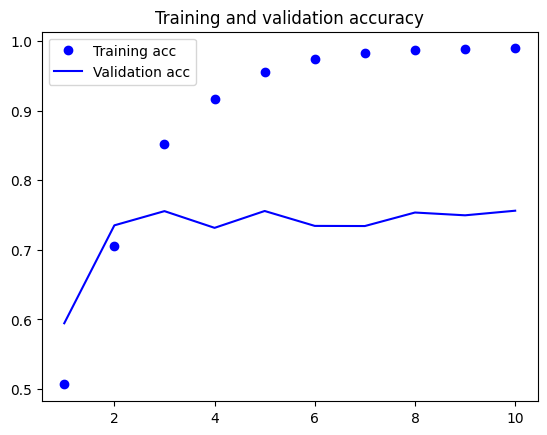

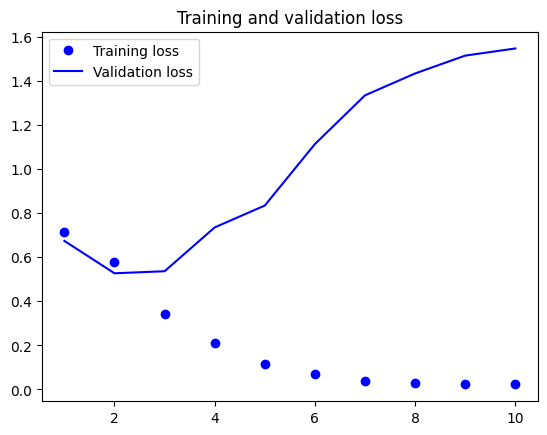

In [ ]:
plot_history(history)

Now train the embedding and the dense layers jointly.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 43s 67ms/step - loss: 0.5947 - acc: 0.7049 - val_loss: 0.4242 - val_acc: 0.8046
Epoch 2/10
625/625 [==============================] - 17s 26ms/step - loss: 0.2666 - acc: 0.8926 - val_loss: 0.4218 - val_acc: 0.8200
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1037 - acc: 0.9643 - val_loss: 0.5346 - val_acc: 0.8270
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0365 - acc: 0.9891 - val_loss: 0.7129 - val_acc: 0.8108
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0123 - acc: 0.9966 - val_loss: 0.8572 - val_acc: 0.8200
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 0.0057 - acc: 0.9982 - val_loss: 1.0079 - val_acc: 0.8200
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0023 - acc: 0.9994 - val_loss: 1.1309 - val_acc: 0.8228
Epoch 8/10
625/625 [==============================] - 4s 6ms/step - l

Let's plot its performance over time:

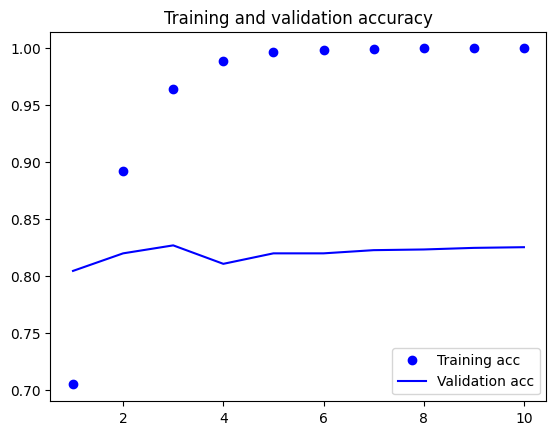

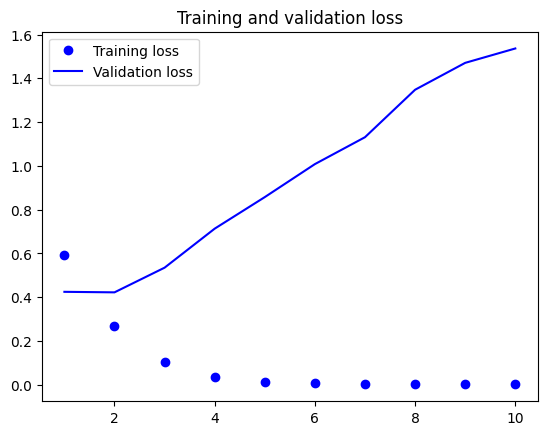

In [ ]:
plot_history(history)

In [ ]:
embedding_matrix1 = model.layers[0].get_weights()[0]

Now we train the embedding and the LSTM layers jointly.

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 38s 59ms/step - loss: 0.4875 - acc: 0.7644 - val_loss: 0.3367 - val_acc: 0.8618
Epoch 2/10
625/625 [==============================] - 21s 33ms/step - loss: 0.3206 - acc: 0.8712 - val_loss: 0.2854 - val_acc: 0.8852
Epoch 3/10
625/625 [==============================] - 17s 27ms/step - loss: 0.2463 - acc: 0.9042 - val_loss: 0.2793 - val_acc: 0.8912
Epoch 4/10
625/625 [==============================] - 15s 24ms/step - loss: 0.1986 - acc: 0.9252 - val_loss: 0.2714 - val_acc: 0.8976
Epoch 5/10
625/625 [==============================] - 14s 23ms/step - loss: 0.1566 - acc: 0.9438 - val_loss: 0.2548 - val_acc: 0.9000
Epoch 6/10
625/625 [==============================] - 13s 21ms/step - loss: 0.1234 - acc: 0.9574 - val_loss: 0.2788 - val_acc: 0.9012
Epoch 7/10
625/625 [==============================] - 13s 22ms/step - loss: 0.0955 - acc: 0.9692 - val_loss: 0.2828 - val_acc: 0.9014
Epoch 8/10
625/625 [==============================] - 13s 20ms

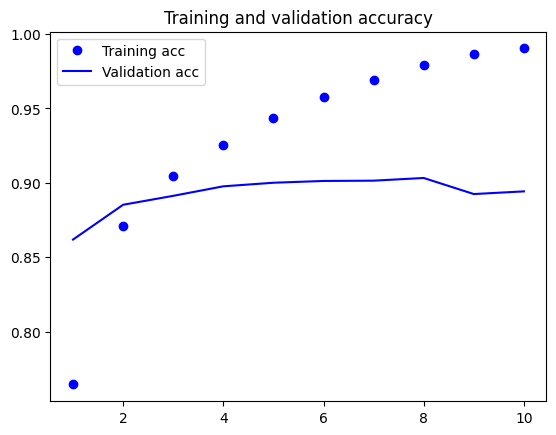

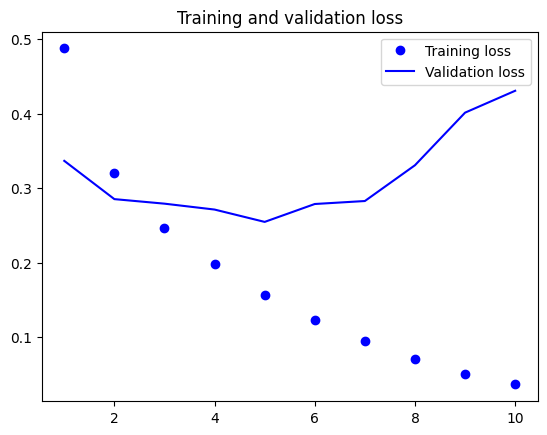

In [ ]:
plot_history(history)

In [ ]:
embedding_matrix2 = model.layers[0].get_weights()[0]

In [ ]:
embedding_matrix2.shape

(10000, 300)

Implement the following three functions that measure the distance between words in the three different embeddings. (20 points)

In [ ]:
def word_dist(word1, word2, embedding_matrix):
    # fill in your code here


def dist_glove(word1, word2):
    return word_dist(word1, word2, embedding_matrix)

def dist_dense(word1, word2):
    return word_dist(word1, word2, embedding_matrix1)

def dist_LSTM(word1, word2):
    return word_dist(word1, word2, embedding_matrix2)

Observe the following reults and check whether dense embedding and LSTM embedding are better than the glove embedding on these results.

In [ ]:
print(dist_glove('better', 'worse') < dist_glove('worst', 'worse'))
print(dist_dense('better', 'worse') < dist_dense('worst', 'worse'))
print(dist_LSTM('better', 'worse') < dist_LSTM('worst', 'worse'))

True
True
True


In [ ]:
print(dist_glove('good', 'bad') < dist_glove('poor', 'bad'))
print(dist_dense('good', 'bad') < dist_dense('poor', 'bad'))
print(dist_LSTM('good', 'bad') < dist_LSTM('poor', 'bad'))

True
False
True


In [ ]:
print(dist_glove('bad', 'good') < dist_glove('great', 'good'))
print(dist_dense('bad', 'good') < dist_dense('great', 'good'))
print(dist_LSTM('bad', 'good') < dist_LSTM('great', 'good'))

True
False
False


In [ ]:
print(dist_glove('clever', 'clumsy') < dist_glove('clever', 'ingenious'))
print(dist_dense('clever', 'clumsy') < dist_dense('clever', 'ingenious'))
print(dist_LSTM('clever', 'clumsy') < dist_LSTM('clever', 'ingenious'))

False
False
False


Find the nearest neighhor of a word for the three embeddings. (20 points)

In [ ]:
def NN_general(word, embedding_matrix):
    # fill in your code here


def NN_LSTM(word):
    return NN_general(word, embedding_matrix2)

def NN_dense(word):
    return NN_general(word, embedding_matrix1)

def NN_glove(word):
    return NN_general(word, embedding_matrix)

List of all the words that the nearest neighbor changes in the LSTM embedding, while its nearest neighbor does not change in the dense embedding.

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_glove(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_LSTM(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: ambitious successful promising
:::: beautifully nicely wonderfully
:::: charisma charm lacks
:::: classic famous favorite
:::: comfort fortunately ironically
:::: dedicated works well
:::: elevate ironically enhance
:::: encourage boost helping
:::: entertain entertains impress
:::: finest best foremost
:::: fun enjoyable entertaining
:::: grand ironically well
:::: holy faith divine
:::: indulgent pretentious overbearing
:::: inspiring captivating inspire
:::: interests regard concerned
:::: intimate lovely fascinating
:::: noteworthy ironically accomplishment
:::: patience wisdom courage
:::: popular notably well
:::: refreshing wonderfully delightful
:::: secure guarantee assure
:::: sensational shocking bizarre
:::: sincerely sorry sincere
:::: tolerable laughable absurdity
:::: willingly reluctantly gladly
:::: anxious worried eager
:::: apocalypse zombie apocalyptic
:::: barbarian savage ironically
:::: bitchy delightfully moronic
:::: dark bright darker
:::: din ironically 

List of the words that its nearest neighbor changes in the dense embedding, while the nearest neighbor does not change in the LSTM embedding.

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_dense(word) != NN_glove(word) and NN_LSTM(word) == NN_glove(word):
        print('::::', word, NN_dense(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: awesome incredible amazing
:::: correctly accurately properly
:::: cure fortunately unfortunately
:::: decent respectable good
:::: enjoys enjoying enjoyed
:::: fantastically amazingly wonderfully
:::: free available well
:::: glamorous sexy stylish
:::: good well better
:::: greatest foremost great
:::: hardy fortunately ironically
:::: hug smiles loving
:::: liked loved likes
:::: love passion loves
:::: loving loved love
:::: luck misfortune unfortunately
:::: master well masters
:::: masterful mesmerizing superb
:::: miracle cure ironically
:::: originality clarity brilliance
:::: passion enthusiasm love
:::: perfect wonderful ideal
:::: powerful strong influential
:::: pride ironically shame
:::: promptly effectively unfortunately
:::: suffice pretend ironically
:::: sweetheart ironically lover
:::: wow glad awesome
:::: accidental fatal mistaken
:::: blind deaf unfortunately
:::: breakdown failure unfortunately
:::: cloud hangs doubt
:::: confront unwilling ignore
:::: confu

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_dense(word) and NN_dense(word) != NN_glove(word) and NN_LSTM(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abundance unfortunately spite ironically
:::: friendly good well helpful
:::: poignant haunting hilarious ironic
:::: sensitive concerned important regard
:::: survival unfortunately ironically success
:::: burden unfortunately inevitably immense
:::: messy mess complicated ugly
:::: shake unfortunately wonder ready
8


Get the list of words that dense embedding and LSTM embedding agree on the nearest neighbor but do not agree with the glove embedding.

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: afford lose unfortunately unfortunately
:::: enough well sufficient sufficient
:::: entertaining amusing enjoyable enjoyable
:::: excellent good superb superb
:::: fantastic amazing incredible incredible
:::: fascinating interesting intriguing intriguing
:::: fond loving ironically ironically
:::: golden best glory glory
:::: great good well well
:::: immense spite incredible incredible
:::: nice wonderful lovely lovely
:::: nifty delightful clever clever
:::: notably well ironically ironically
:::: patient unfortunately sick sick
:::: profoundly terribly disturbed disturbed
:::: pure unfortunately ideal ideal
:::: readily unfortunately ironically ironically
:::: restored ruined ironically ironically
:::: right well good good
:::: superb excellent brilliant brilliant
:::: well like good good
:::: wise foolish ironically ironically
:::: absurdity stupidity irony irony
:::: bad unfortunately worse worse
:::: bore unfortunately ironically ironically
:::: bust unfortunately ironically

Get the list of words that glove, dense, LSTM embeddings all agree on the nearest neighbor.

In [ ]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abound ironically ironically ironically
:::: accessible available available available
:::: acclaim praise praise praise
:::: acclaimed renowned renowned renowned
:::: accomplish accomplished accomplished accomplished
:::: accomplished accomplish accomplish accomplish
:::: accomplishment achievement achievement achievement
:::: accurate precise precise precise
:::: accurately correctly correctly correctly
:::: achievement accomplishment accomplishment accomplishment
:::: achievements achievement achievement achievement
:::: adequate sufficient sufficient sufficient
:::: admirable commendable commendable commendable
:::: admirably excellently excellently excellently
:::: admiration affection affection affection
:::: admire appreciate appreciate appreciate
:::: admirer avid avid avid
:::: adorable cute cute cute
:::: adore despise despise despise
:::: adored disliked disliked disliked
:::: advanced well well well
:::: advantage gain gain gain
:::: adventurous inventive inventive inve

## Visualization of the three embeddings. We want to see how the positive words and negative words are spreaded in two dimensional space.

In [ ]:
emb_glove = []
emb_dense = []
emb_LSTM = []
for word in L_POS + L_NEG:
    emb = embedding_matrix[word_index[word]]
    emb_glove.append(emb)
    emb = embedding_matrix1[word_index[word]]
    emb_dense.append(emb)
    emb = embedding_matrix2[word_index[word]]
    emb_LSTM.append(emb)

In [ ]:
emb_glove = np.array(emb_glove)
emb_dense = np.array(emb_dense)
emb_LSTM = np.array(emb_LSTM)

In [ ]:
emb_glove.shape, emb_dense.shape, emb_LSTM.shape

((1867, 300), (1867, 300), (1867, 300))

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_LSTM = TSNE(n_components=2).fit_transform(emb_LSTM)

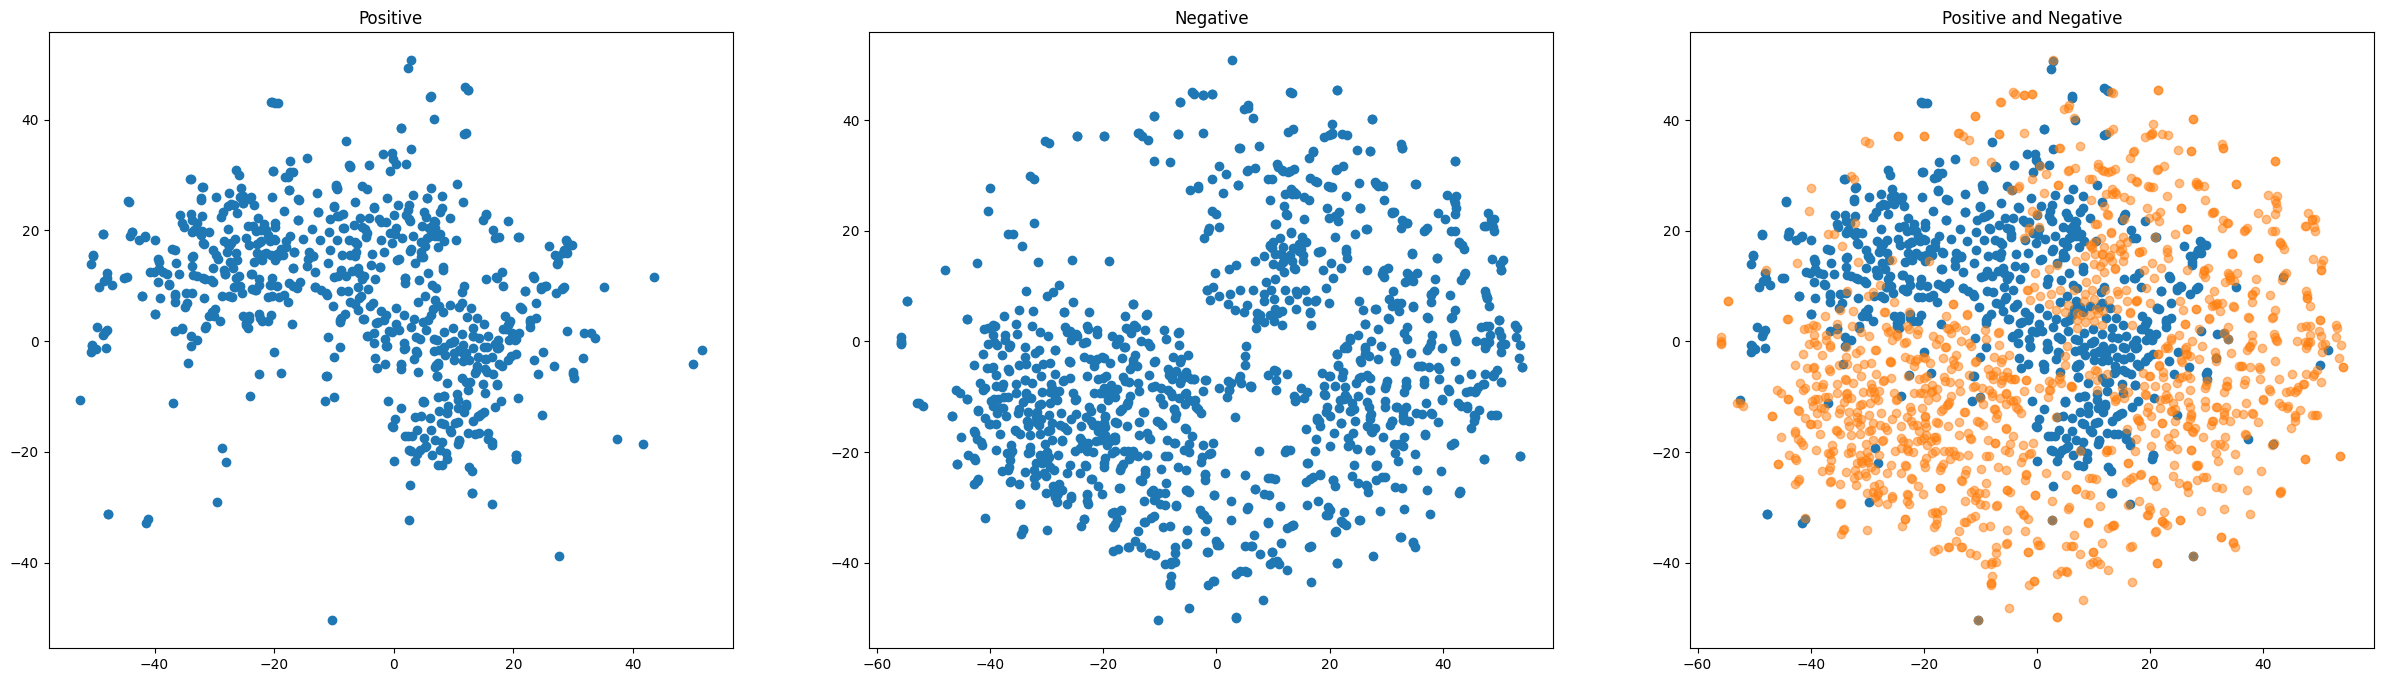

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_dense = TSNE(n_components=2).fit_transform(emb_dense)

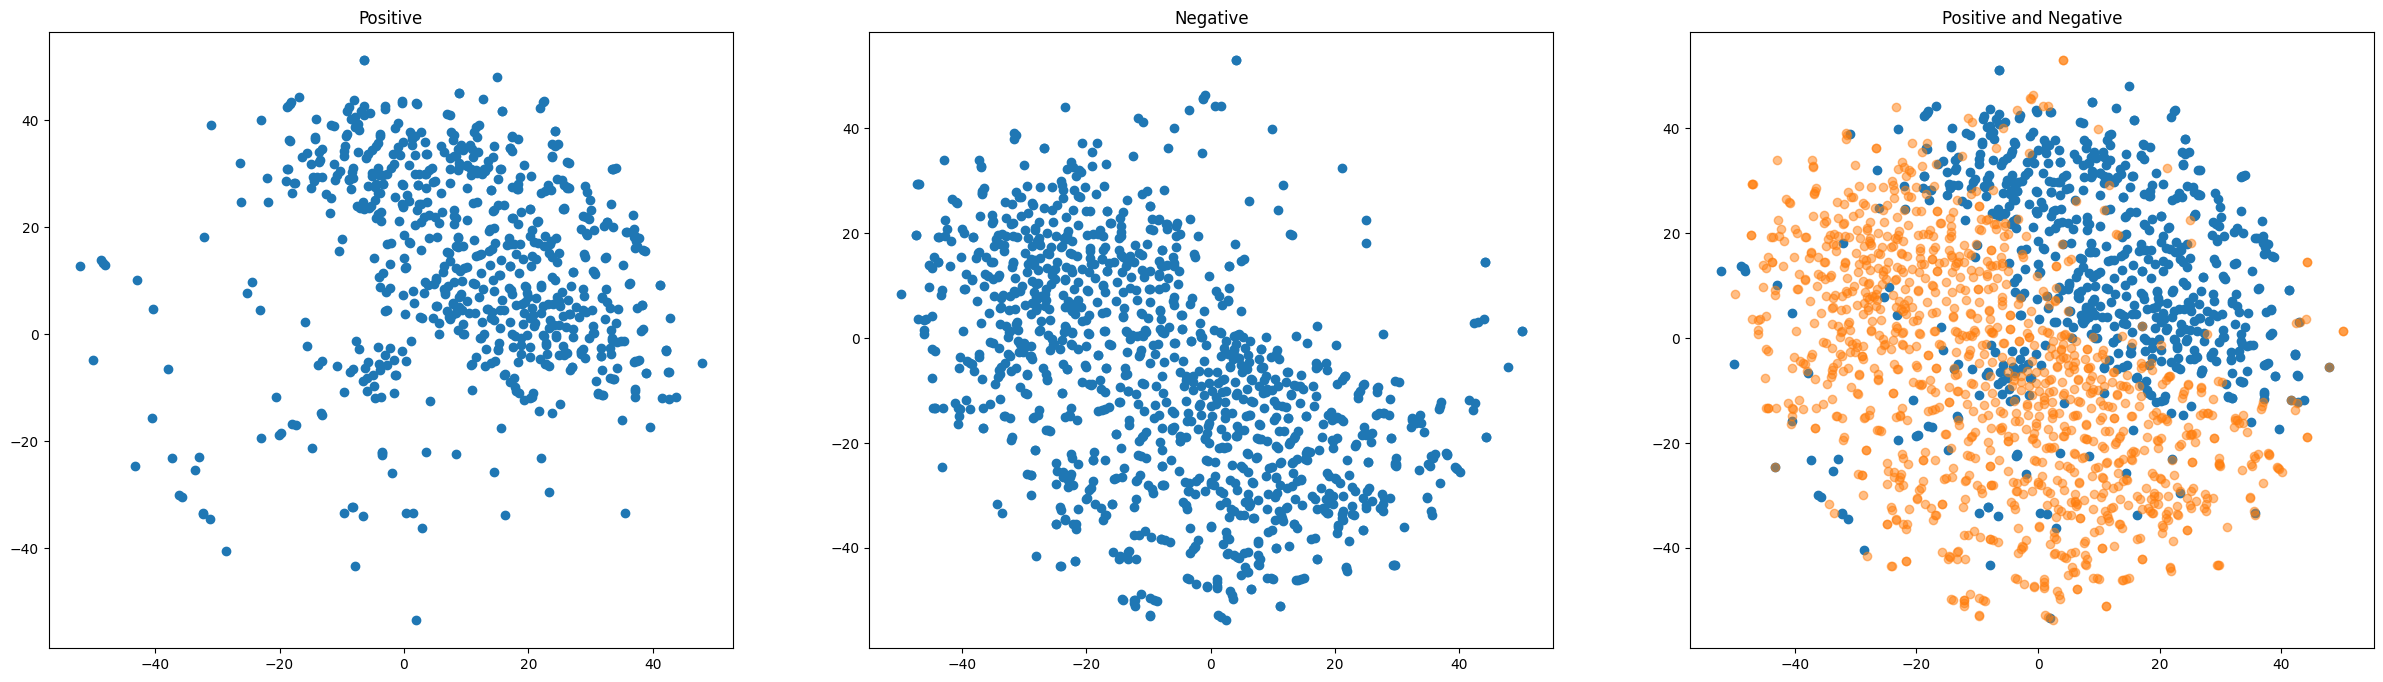

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_glove = TSNE(n_components=2).fit_transform(emb_glove)

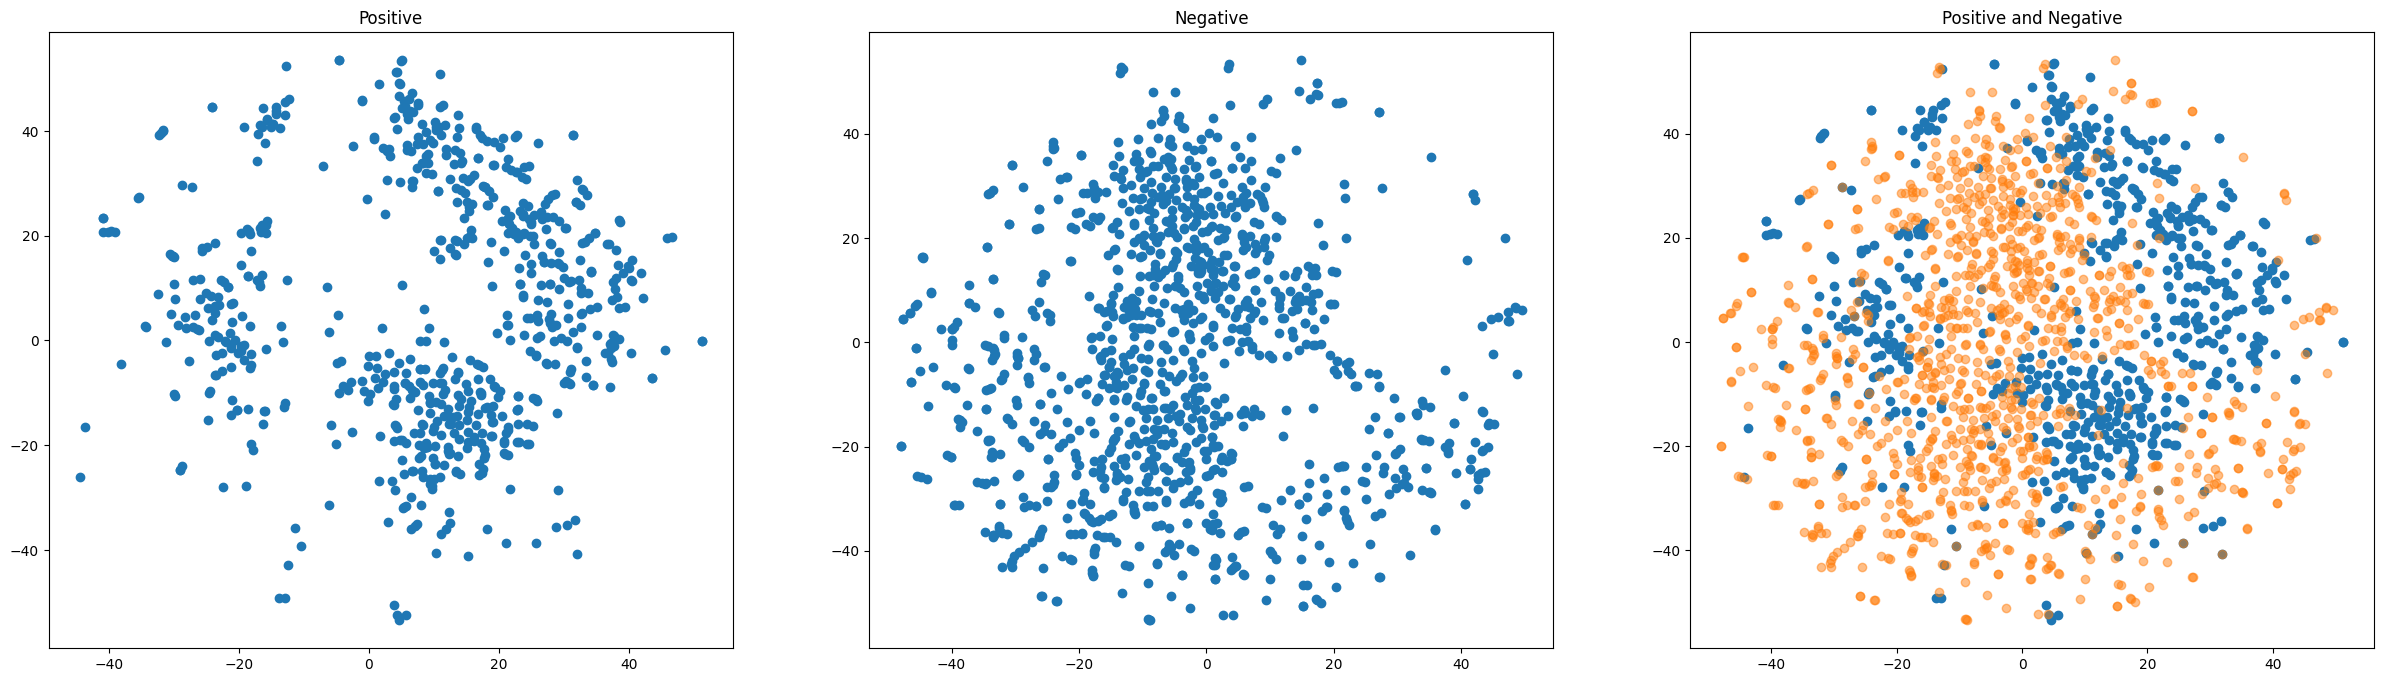

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

Next we implement the class distance function for the three embeddings. (40 points)

In [ ]:
def class_dist(L_POS, L_NEG, embedding_matrix):
    # fill in your code here
    # We first calcuate the average distance between a word in L_POS and a word in L_NEG. We call this d12
    # We then calcuate the average distance between two words in L_POS + L_NEG. We call this d
    # We return d12/d as the result


def class_dist_glove():
    return class_dist(L_POS, L_NEG, embedding_matrix)

def class_dist_dense():
    return class_dist(L_POS, L_NEG, embedding_matrix1)

def class_dist_LSTM():
    return class_dist(L_POS, L_NEG, embedding_matrix2)

d_glove = class_dist_glove()
d_dense = class_dist_dense()
d_LSTM = class_dist_LSTM()

In [ ]:
print(d_glove, d_dense, d_LSTM)
print("Relative improvments:")
print("Dense:", (d_dense-d_glove)/d_glove*100)
print("LSTM:", (d_LSTM-d_glove)/d_glove*100)

1.0092813998537706 1.0104405672513437 1.0096542119610055
Relative improvments:
Dense: 0.11485076389409257
LSTM: 0.03693837093290801


Now we double check the chosen embedding is indeeded better. We use the chosen embedding and LSTM model and check whether the valdidation accuracy is better.

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 14s 19ms/step - loss: 0.4106 - acc: 0.8180 - val_loss: 0.3524 - val_acc: 0.8488
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3187 - acc: 0.8694 - val_loss: 0.2964 - val_acc: 0.8772
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2789 - acc: 0.8874 - val_loss: 0.3313 - val_acc: 0.8628
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2533 - acc: 0.8993 - val_loss: 0.2663 - val_acc: 0.8916
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2319 - acc: 0.9085 - val_loss: 0.2617 - val_acc: 0.8954
Epoch 6/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2165 - acc: 0.9144 - val_loss: 0.3140 - val_acc: 0.8662
Epoch 7/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2000 - acc: 0.9208 - val_loss: 0.2603 - val_acc: 0.8902
Epoch 8/10
625/625 [==============================] - 11s 18ms

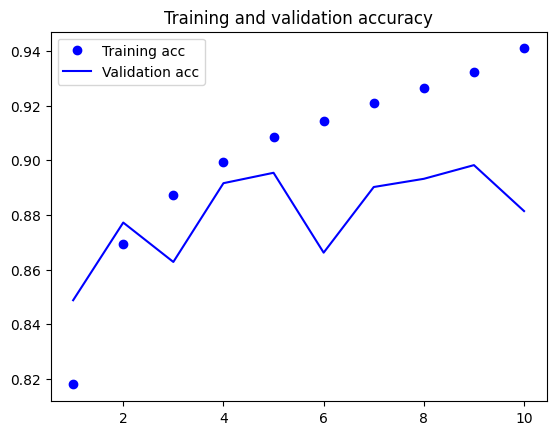

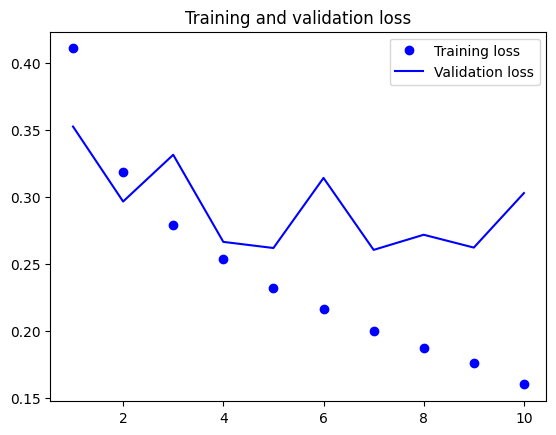

In [ ]:
plot_history(history)

## Building a Y-network model

In this model, we have two inputs and one output. The Y-network uses the same input twice, both on the left and right convnets braches. The left and right branches have the same setup.

In [ ]:
from keras import backend as K

K.clear_session()

In [ ]:
import keras
from keras import layers
from keras import models

input_shape = (maxlen, )

left_inputs = layers.Input(shape=input_shape)

x = Embedding(max_words, embedding_dim, weights=[embedding_matrix1], trainable=False, input_length=maxlen)(left_inputs)

x = layers.Bidirectional(layers.LSTM(128, return_sequences = True))(x)

x = layers.Conv1D(64, 7, activation='relu')(x)

x = layers.GlobalMaxPool1D()(x)

right_inputs = layers.Input(shape=input_shape)

y = layers.Embedding(max_words, embedding_dim, weights=[embedding_matrix1], trainable=False, input_length=maxlen)(right_inputs)

y = layers.Bidirectional(LSTM(128, return_sequences = True))(y)

y = layers.Conv1D(64, 7, activation='relu')(y)

y = layers.GlobalMaxPool1D()(y)

x = layers.concatenate([x, y])
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model = models.Model([left_inputs, right_inputs], outputs=outputs)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 600, 300)             3000000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 600, 300)             3000000   ['input_2[0][0]']             
                                                                                              

In [ ]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D.h5', monitor='val_loss', save_best_only=True,)]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit([x_train, x_train], y_train, shuffle=True,
                    epochs=200,
                    batch_size=32,
                    callbacks=callbacks_list,
                    validation_data=([x_val, x_val], y_val))

Epoch 1/200
625/625 [==============================] - 57s 79ms/step - loss: 0.3212 - acc: 0.8633 - val_loss: 0.2616 - val_acc: 0.8882
Epoch 2/200
  1/625 [..............................] - ETA: 41s - loss: 0.2390 - acc: 0.9062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 47s 76ms/step - loss: 0.2378 - acc: 0.9061 - val_loss: 0.2503 - val_acc: 0.8904
Epoch 3/200
625/625 [==============================] - 48s 76ms/step - loss: 0.1982 - acc: 0.9230 - val_loss: 0.2385 - val_acc: 0.8978
Epoch 4/200
625/625 [==============================] - 48s 76ms/step - loss: 0.1521 - acc: 0.9427 - val_loss: 0.2769 - val_acc: 0.9060
Epoch 5/200
625/625 [==============================] - 48s 76ms/step - loss: 0.1120 - acc: 0.9596 - val_loss: 0.2920 - val_acc: 0.8988
Epoch 6/200
625/625 [==============================] - 48s 77ms/step - loss: 0.0711 - acc: 0.9738 - val_loss: 0.3466 - val_acc: 0.9044
Epoch 7/200
625/625 [==============================] - 48s 76ms/step - loss: 0.0424 - acc: 0.9853 - val_loss: 0.4814 - val_acc: 0.8940
Epoch 8/200
625/625 [==============================] - 48s 77ms/step - loss: 0.0328 - acc: 0.9875 - val_loss: 0.4567 - val_acc: 0.8980


In [ ]:
print(model.layers[3].name)

embedding_1


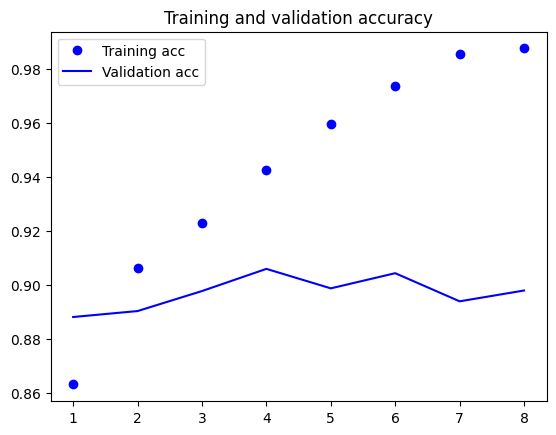

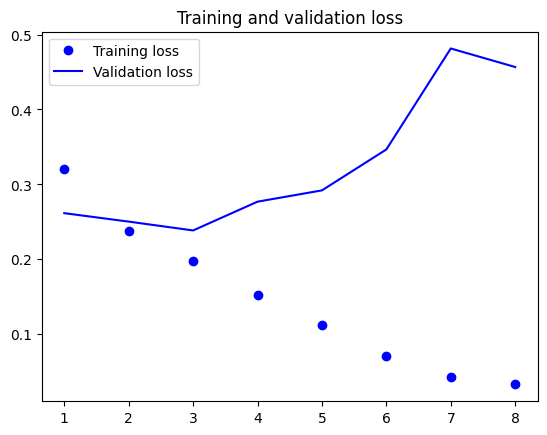

In [ ]:
plot_history(history)

Now we load the model and make the word embeddings on the left branch trainable.

In [ ]:
model = keras.models.load_model('LSTM_Conv1D.h5')
for i in range(len(model.layers)):
    model.layers[i].trainable = False

model.layers[2].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 600, 300)             3000000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 600, 300)             3000000   ['input_2[0][0]']             
                                                                                              

In [ ]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D_retrain.h5', monitor='val_loss', save_best_only=True,)]


history = model.fit([x_train, x_train], y_train, shuffle=True,
                    epochs=200,
                    batch_size=32,
                    callbacks=callbacks_list,
                    validation_data=([x_val, x_val], y_val))

Epoch 1/200
625/625 [==============================] - 108s 165ms/step - loss: 0.1318 - acc: 0.9567 - val_loss: 0.2275 - val_acc: 0.9056
Epoch 2/200
625/625 [==============================] - 61s 97ms/step - loss: 0.0972 - acc: 0.9716 - val_loss: 0.2298 - val_acc: 0.9062
Epoch 3/200
625/625 [==============================] - 45s 72ms/step - loss: 0.0714 - acc: 0.9826 - val_loss: 0.2393 - val_acc: 0.9034
Epoch 4/200
625/625 [==============================] - 44s 70ms/step - loss: 0.0533 - acc: 0.9900 - val_loss: 0.2427 - val_acc: 0.9044
Epoch 5/200
625/625 [==============================] - 41s 66ms/step - loss: 0.0397 - acc: 0.9944 - val_loss: 0.2497 - val_acc: 0.9056
Epoch 6/200
625/625 [==============================] - 40s 63ms/step - loss: 0.0305 - acc: 0.9972 - val_loss: 0.2557 - val_acc: 0.9034


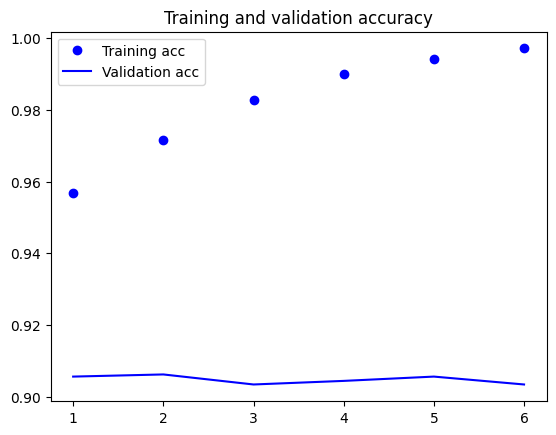

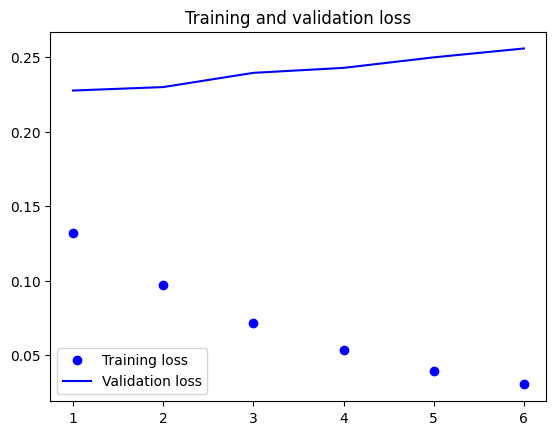

In [ ]:
plot_history(history)

Now we load the model and make the embedding on the right branch trainable.

In [ ]:
model = keras.models.load_model('LSTM_Conv1D_retrain.h5')
for i in range(len(model.layers)):
    model.layers[i].trainable = False

model.layers[3].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 600, 300)             3000000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 600, 300)             3000000   ['input_2[0][0]']             
                                                                                              

In [ ]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D_retrain_1.h5', monitor='val_loss', save_best_only=True,)]


history = model.fit([x_train, x_train], y_train, shuffle=True,
                    epochs=200,
                    batch_size=32,
                    callbacks=callbacks_list,
                    validation_data=([x_val, x_val], y_val))

Epoch 1/200
625/625 [==============================] - 80s 120ms/step - loss: 0.0988 - acc: 0.9700 - val_loss: 0.2249 - val_acc: 0.9106
Epoch 2/200
625/625 [==============================] - 53s 85ms/step - loss: 0.0638 - acc: 0.9847 - val_loss: 0.2285 - val_acc: 0.9088
Epoch 3/200
625/625 [==============================] - 45s 72ms/step - loss: 0.0431 - acc: 0.9923 - val_loss: 0.2370 - val_acc: 0.9112
Epoch 4/200
625/625 [==============================] - 41s 65ms/step - loss: 0.0290 - acc: 0.9964 - val_loss: 0.2489 - val_acc: 0.9084
Epoch 5/200
625/625 [==============================] - 39s 62ms/step - loss: 0.0198 - acc: 0.9984 - val_loss: 0.2638 - val_acc: 0.9078
Epoch 6/200
625/625 [==============================] - 38s 62ms/step - loss: 0.0141 - acc: 0.9995 - val_loss: 0.2747 - val_acc: 0.9070


Now we load the best model. And then we evaluate the model using the test data.

In [ ]:
model = keras.models.load_model('LSTM_Conv1D_retrain_1.h5')

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.evaluate([x_test, x_test], y_test)

782/782 [==============================] - 25s 30ms/step - loss: 0.2223 - acc: 0.9127


[0.22225797176361084, 0.9127200245857239]

We did beat the 90% of accuracy. Pay attention to the tecniques we used to achieve this goal. To save time, I only showed one model above. In fact, I tried many different models and optimizers. A few of these combinations should be able to beat 90% of accuracy. The above is the one I think is both promising and realtively simple.